# NBA 2023/24 Efficiency Score

In [27]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2024_per_game.html', attrs={'id': 'per_game_stats'})[0]

In [31]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


In [33]:
import pandas as pd

# Tekrar eden satırları bulma
duplicates = df[df.duplicated()]

# Tekrar eden satırları yazdırma
print("Tekrar Eden Satırlar:")
print(duplicates)

Tekrar Eden Satırlar:
     Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB  \
59   Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB   
92   Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB   
119  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB   
140  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB   
165  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB   
190  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB   
222  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB   
256  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB   
279  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB   
304  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB   
327  Rk  Player  Pos  Age  Tm  G  GS  MP  FG  FGA  ...  FT%  ORB  DRB  TRB   
350  Rk  Player  Pos  Age  Tm  G  GS  MP  

In [35]:
df.duplicated().sum()

27

In [37]:
df = df.drop_duplicates()

In [39]:
df.duplicated().sum()

0

In [41]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

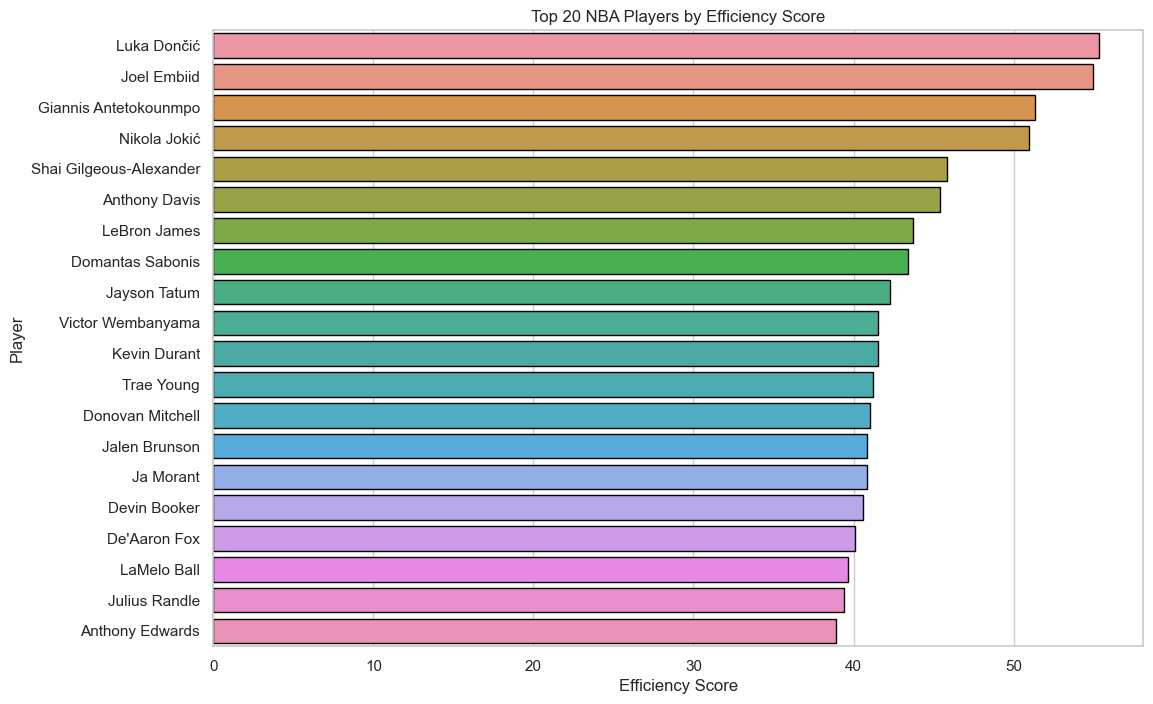

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define weights
alpha = 1.0  # Points (PTS)
beta = 1.0   # Assists (AST)
gamma = 1.0  # Rebounds (TRB)
delta = 1.2  # Steals (STL)
epsilon = 1.1  # Blocks (BLK)
zeta = 0.2   # Turnovers (TOV)
eta = 0.6    # Field Goal % (FG%)
theta = 0.9  # Free Throw % (FT%)

# Ensure numeric data
numeric_columns = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', 'FT%']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Efficiency Score
df['Efficiency_Score'] = (alpha * df['PTS'] +
                          beta * df['AST'] +
                          gamma * df['TRB'] +
                          delta * df['STL'] +
                          epsilon * df['BLK'] -
                          zeta * df['TOV'] +
                          eta * df['FG%'] +
                          theta * df['FT%'])

# Drop rows with NaN values in 'Efficiency_Score'
df = df.dropna(subset=['Efficiency_Score'])

# Get the top 20 players by Efficiency Score
top_20_players = df[['Player', 'Pos', 'Efficiency_Score']].sort_values(by='Efficiency_Score', ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

bar_plot = sns.barplot(x='Efficiency_Score', y='Player', data=top_20_players, edgecolor='black')

plt.xlabel('Efficiency Score')
plt.ylabel('Player')
plt.title('Top 20 NBA Players by Efficiency Score')

plt.show()


In [45]:
all = df[(df["Efficiency_Score"] >= 36)].sort_values(by="Efficiency_Score",ascending=False).reset_index(drop=True)

In [47]:
all[["Player","Pos","Age","Tm","Efficiency_Score"]]

,Player,Pos,Age,Tm,Efficiency_Score
0,Luka Dončić,PG,24,DAL,55.3296
1,Joel Embiid,C,29,PHI,54.9621
2,Giannis Antetokounmpo,PF,29,MIL,51.3279
3,Nikola Jokić,C,28,DEN,50.9551
4,Shai Gilgeous-Alexander,PG,25,OKC,45.8576
5,Anthony Davis,C,30,LAL,45.4180
6,LeBron James,PF,39,LAL,43.7090
7,Domantas Sabonis,C,27,SAC,43.3700
8,Jayson Tatum,PF,25,BOS,42.2923
9,Victor Wembanyama,C,20,SAS,41.5554


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Define weights
alpha = 1.0  # Points (PTS)
beta = 1.0   # Assists (AST)
gamma = 1.0  # Rebounds (TRB)
delta = 1.2  # Steals (STL)
epsilon = 1.1  # Blocks (BLK)
zeta = 0.2   # Turnovers (TOV)
eta = 0.6    # Field Goal % (FG%)
theta = 0.9  # Free Throw % (FT%)

# Ensure numeric data
numeric_columns = ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', 'FT%']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate Efficiency Score
df['Efficiency_Score'] = (alpha * df['PTS'] +
                          beta * df['AST'] +
                          gamma * df['TRB'] +
                          delta * df['STL'] +
                          epsilon * df['BLK'] -
                          zeta * df['TOV'] +
                          eta * df['FG%'] +
                          theta * df['FT%'])

# Drop rows with NaN values in 'Efficiency_Score'
df = df.dropna(subset=['Efficiency_Score'])

# Define features and target
features = df[['PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', 'FT%']]
target = df['Efficiency_Score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Optionally, you can inspect the feature importances
importances = model.feature_importances_
features_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importances})
print(features_importance_df.sort_values(by='Importance', ascending=False))

Mean Squared Error: 0.96
  Feature  Importance
0     PTS    0.884852
2     TRB    0.051011
5     TOV    0.035668
1     AST    0.019890
3     STL    0.006007
4     BLK    0.001893
6     FG%    0.000441
7     FT%    0.000238


In [51]:
y_pred

array([29.53039502, 16.18445912, 18.64826064, 12.08674378, 21.59131627,
        7.1672127 , 21.50299163, 24.89929571, 10.69974609, 10.84251545,
       10.78217186,  9.7488927 ,  2.89357078, 40.43775327, 11.62724874,
       18.04896179, 12.93023641, 23.18582047, 22.34921353, 25.97768575,
       40.10689203, 29.22686807,  7.3838305 ,  6.89089235,  8.45531286,
       13.40245306,  7.17877807, 17.45651827, 29.42624502, 14.14164967,
        8.17406234, 15.91860182, 12.32183564, 34.85224277,  7.34451971,
        8.50796735,  6.56949881, 12.82639268, 40.17010994, 10.325769  ,
        9.58212043, 31.64084354, 20.83673019, 15.44826649,  7.72226833,
       24.37683614, 35.73588674, 15.7903012 , 15.39889398, 25.60626982,
       13.10482136, 15.5153979 ,  7.28509926, 16.93297355, 21.44786618,
        2.25837204, 19.32351277,  5.1315499 ,  8.56364094, 13.31089287,
       30.766418  , 10.5870033 , 11.51857968, 13.35870443,  5.97371906,
        8.28918175,  8.75182863,  5.11384253,  2.21403543,  8.79

In [53]:
test_data = X_test.copy()
test_data['Actual_Score'] = y_test
test_data['Predicted_Score'] = y_pred

test_data = pd.concat([test_data, df.loc[X_test.index, ['Player']]], axis=1)

print(test_data[['Player', 'Actual_Score', 'Predicted_Score']])

               Player  Actual_Score  Predicted_Score
719        Coby White       30.3624        29.530395
341      Trey Jemison       15.9166        16.184459
416          Tre Mann       19.0921        18.648261
550     Jontay Porter       12.5607        12.086744
648    Isaiah Stewart       21.1499        21.591316
..                ...           ...              ...
55       Bradley Beal       29.8895        30.144005
229  Danilo Gallinari        6.0969         6.242053
606     Marcus Sasser       15.1279        14.621969
480     Marcus Morris       11.3696        12.251743
281       Gary Harris       12.4350        12.433343

[136 rows x 3 columns]


In [55]:
top_10_actual_scores = test_data[['Player', 'Actual_Score',"Predicted_Score"]].sort_values(by='Actual_Score', ascending=False).head(20)

print("En Yüksek Gerçek Verimlilik Skorlarına Sahip 10 Oyuncu:")
print(top_10_actual_scores.to_string(index=False))

En Yüksek Gerçek Verimlilik Skorlarına Sahip 10 Oyuncu:
        Player  Actual_Score  Predicted_Score
   Luka Dončić       55.3296        48.290058
  Nikola Jokić       50.9551        48.162831
    Trae Young       41.2275        40.170110
  Devin Booker       40.5926        40.437753
  De'Aaron Fox       40.0632        40.106892
Paolo Banchero       36.9455        35.735887
 DeMar DeRozan       36.2957        37.554086
 Pascal Siakam       35.0104        34.420692
 Pascal Siakam       34.8785        34.852243
   Paul George       34.3289        33.637798
    RJ Barrett       33.8579        33.512852
  Jimmy Butler       33.7216        34.324935
 Jarrett Allen       32.4782        31.640844
   Rudy Gobert       32.0008        29.226868
  Terry Rozier       31.6379        32.778791
 Jalen Johnson       31.2218        30.030747
 Chet Holmgren       30.7617        29.426245
   Zach LaVine       30.5098        30.586789
    RJ Barrett       30.4405        31.988807
    Coby White       30.

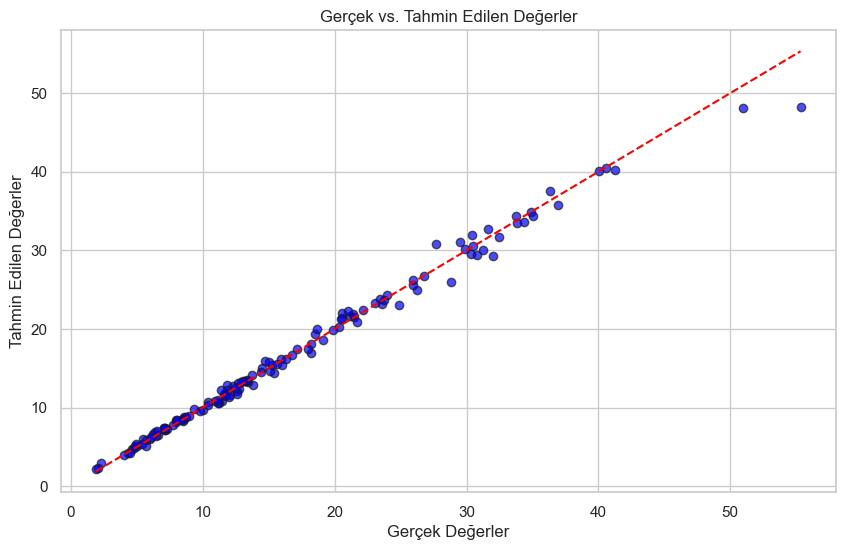

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.show()

In [ ]:
# jupyter nbconvert --to script nba1.ipynb :))